Welcome to HW 5! Today we're going to take a look at dimensionality reduction and clustering with the Mnist dataset. 

Just a note on format: I made the inline comments as I went, so you can see my reasoning at each step of the process. I went through and added markdown blocks later to provide a global structure. Because of this most of the homework points are best addressed through the inline comments. Thanks!

In [3]:
#Copying Tyler's code seems appropriate here
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [14]:
#see what we're dealing with
X.shape

(70000, 784)

Let's go through PCA! First I determine the best number of components, which looks like about 16 to me.

In [4]:
#OK let's run this through PCA
from sklearn.decomposition import PCA


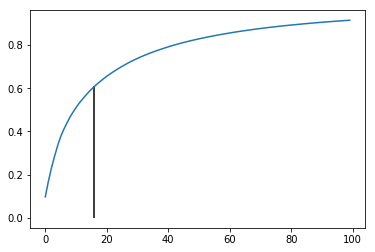

In [24]:
import numpy as np
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[16],x=16)

Now let's take a plot of our first two components. As expected the first component has higher variance than our second component. Just for fun I decided to plot the first two dimensions with labels. It's hard to say anything from this, but it's interesting

In [82]:
#So it looks like 16 is our best bet
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)

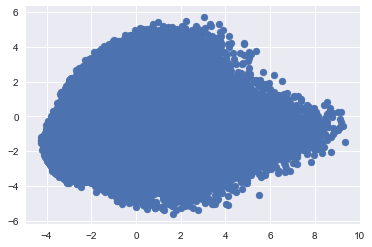

In [24]:
#let's plot the data!
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[:,0],X_pca[:,1])

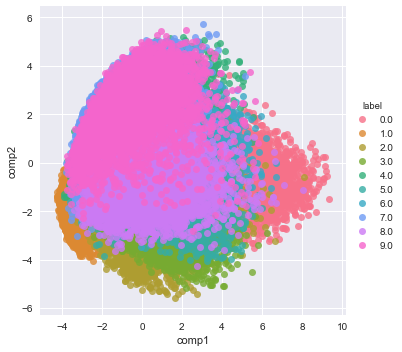

In [94]:
#You can see that my first component has higher variance than my second component, which is as it should be.There's not really a
#a trend here, though. It's just one large mass.

#graph with the labels
df = pd.DataFrame(X_pca[:,0:2], columns=['comp1', 'comp2'])
df['label'] = y
sns.lmplot(x='comp1', y='comp2', data=df, hue='label', fit_reg=False)

#You can see the data are clustered, but not very distinctly.


We're using PCE so that we can do machine learning without so many dimensions. This helps us to be able to compute much faster. Unfortunately, it also is much less accurate, as information can be lost. Let's take a look the information by plotting and reconstructing the same image.

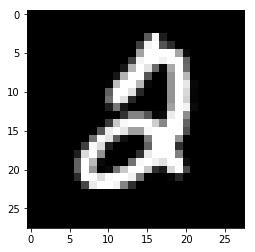

In [34]:
#Plotting an image
pixels = X[13342].reshape((28, 28))
plt.imshow(pixels, cmap='gray')

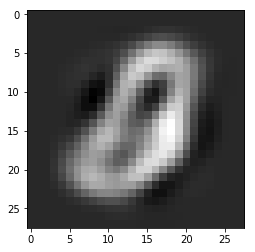

In [36]:
#decompressing image
img = X_pca[13342,0:16]
img = pca.inverse_transform(img)
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

Because I'm a curious man, I decided to look at how much OLS does worse with just 16 instead of all the features. It's worse, but not by a ton. We only loose .15 on our R^2, but it's much faster to use the PCA data.

In [39]:
#Well, that's rather difficult to distinguish :) Maybe not the best thing to do. Because I'm curios, I'm going to run 
#a linear regression on our PCA data.

from sklearn import linear_model

linear = linear_model.LinearRegression()
linear.fit(X_pca, y)
linear.score(X_pca, y)

0.46822635398728796

In [40]:
#As opposed to 
linear = linear_model.LinearRegression()
linear.fit(X, y)
linear.score(X, y)

0.61803915658845765

Now we move on to T-SNE. It should be noted that I chose to make these plots with a random sample of 1000 and not 10000, so they look different from the graphs in the lecture notes. Though the spatiality isn't really preserved, I got the same kinds of clusters. 

In [2]:
#Let's go on to T-sne
from sklearn.manifold import TSNE

In [58]:
#Since we're taking a random sample I'm going to concatenate them together and then split them up again
data = np.concatenate((X,y.reshape((-1,1))),axis=1)

#Let's take a random sample of our data (thanks, stack overflow!)
datas = data[np.random.choice(data.shape[0], 1000, replace=False), :]

In [69]:
#split data again
Xs = datas[:,:784]
Ys = datas[:,784]

In [73]:
#We need to run PCA on this to make it not take forever.
pca = PCA(n_components=60)
Xs_pca = pca.fit_transform(Xs)

In [75]:
#Let's actually run the tsne!
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(Xs_pca)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.865734
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.088626
[t-SNE] Error after 325 iterations: 1.088626


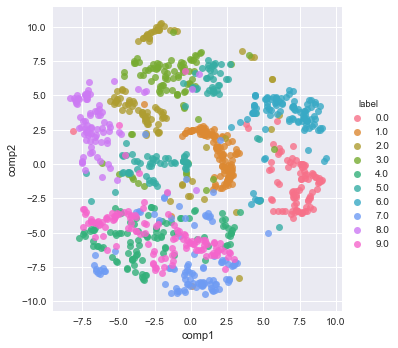

In [77]:
#plot our tsne
import pandas as pd
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = Ys
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.044233
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.913312
[t-SNE] Error after 325 iterations: 0.913312


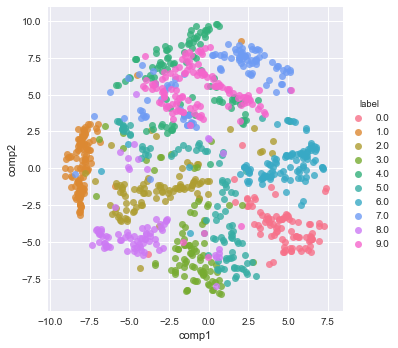

In [78]:
#Let's look at how robust this is to a change in perpelxity:
tsne = TSNE(n_components=2, verbose=1, perplexity=75, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(Xs_pca)
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = Ys
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 322 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.193563
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.775492
[t-SNE] Error after 300 iterations: 0.775492


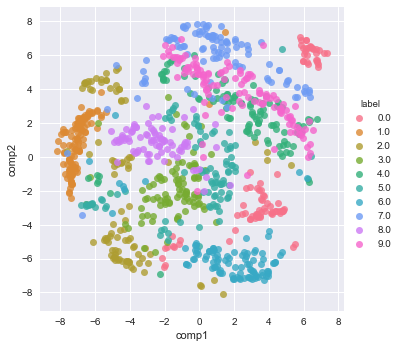

In [79]:
#Let's try one more
tsne = TSNE(n_components=2, verbose=1, perplexity=107, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(Xs_pca)
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = Ys
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [80]:
#So, yes, this appears to be fairly robust with perplexity. It still has a hard time separating 6 9 and 4, and it does a good job
#at identifying 1, 0, 7, 2, 3 and 8, mostly. This is much better than our pca plot.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.947618
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.185359
[t-SNE] Error after 375 iterations: 1.185359


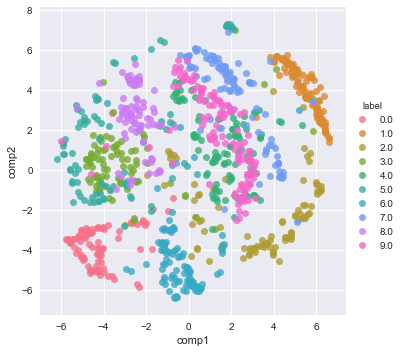

In [95]:
#Let's try changing the learning rate:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(Xs_pca)
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = Ys
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.947618
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.890847
[t-SNE] Error after 475 iterations: 0.890847


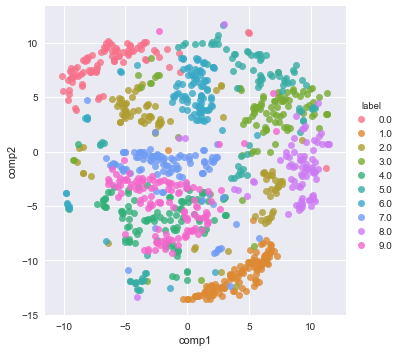

In [96]:
#Let's try changing the learning rate (reprise)
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000, learning_rate=400)
tsne_results = tsne.fit_transform(Xs_pca)
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = Ys
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [97]:
#Well, we get about the same clusters either way.

Now we move on to K-means. This one was fun, though it was dissapointing when the first run I did was did about as good as random. Again, to save on computation time I used PCA data with 60 components and took a random sample of 1000.

In [14]:
#We are trying to distinguish between 10 numbers, so k=10 makes sense. 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=20, n_jobs=-1)

#We use our pca data because, otherwise it would take forever.
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)
kmeans.fit(X_pca)
kmeans.score(X_pca)

-2203080.7626046254

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.884951
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.839997
[t-SNE] Error after 375 iterations: 0.839997


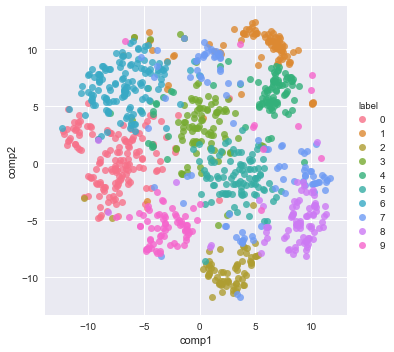

In [25]:
#Let's visualize our clusters
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000, learning_rate=400)
rows = np.arange(70000)
np.random.shuffle(rows)
tsne_results = tsne.fit_transform(X_pca[rows[:1000],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = kmeans.predict(X_pca[rows[:1000],:])
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [27]:
#Our clusters are pretty well defined! I'd say we did a pretty good job of making the clusters then, maybe?

#scaling our data in this case would have been a bad idea. Our pca variables differed in variance by construction and that 
#variance is important. Our pixels all varied in the same way

#we can evaluate our data fairly easily because we have labels.
from sklearn import metrics
metrics.adjusted_rand_score(y, kmeans.predict(X_pca)) 

-2.4176665921789747e-05

In [15]:
#We can see that kmeans actually does pretty bad at picking out 0-9

Here I check for robustness and get slightly better results, suggesting that my results aren't robust. This isn't surprising since I have a small value for n_init.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.907972
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.886170
[t-SNE] Error after 375 iterations: 0.886170


0.36469663194204127

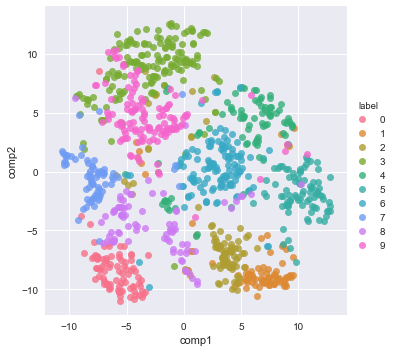

In [13]:
#Let's do a quick robustness check before moving on. I'm just going to run the above again and see what kind of score we get.

kmeans = KMeans(n_clusters=10, n_init=20, n_jobs=-1)

#We use our pca data because, otherwise it would take forever.
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)
kmeans.fit(X_pca)
kmeans.score(X_pca)

tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000, learning_rate=400)
rows = np.arange(70000)
np.random.shuffle(rows)
tsne_results = tsne.fit_transform(X_pca[rows[:1000],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = kmeans.predict(X_pca[rows[:1000],:])
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

metrics.adjusted_rand_score(y, kmeans.predict(X_pca)) 

This cluster k-means did a lot better, so I'd say our results aren't very robust. Perhaps if we tried long enough we could get it to cluster around the actual numbers.

Finally, here I do Hierarchical clustering. I try out various clustering methods. I find that the single method does terribly (it resembles a blob consuming everything in its path, one by one) and complete and ward do a pretty good job of finding 10 equally sized clusters. (That's the hope since there are 10 classes we're trying to predict).

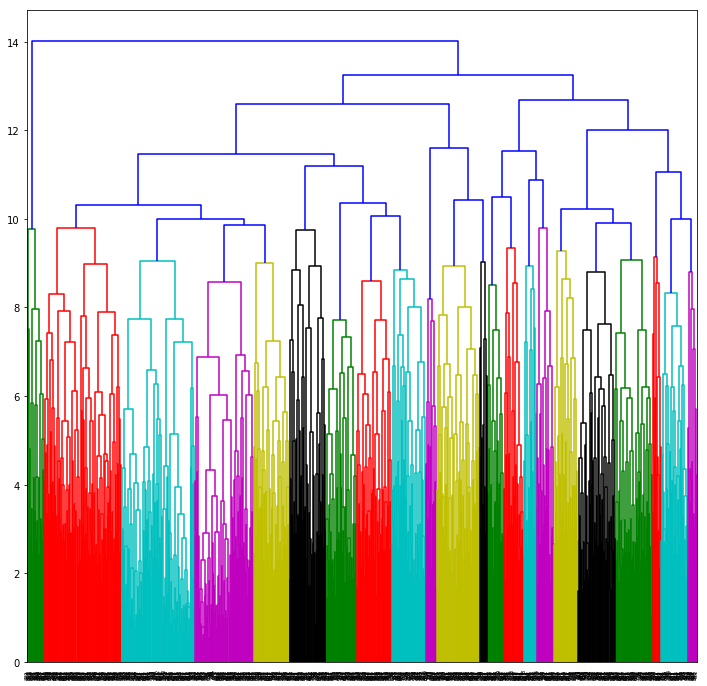

In [11]:
#OK moving on! Let's do hierarchical clustering. I just copied tyler's code here, but I do understand it.
#import
from scipy.cluster.hierarchy import dendrogram, linkage

#Perform clustering. Note that I'm only sampling my data here, because I tried to do the whole thing
#and my computer crashed.
Z = linkage(X_pca[rows[:1000],:], 'complete')
#Congfigure plot
plt.figure(figsize=(12, 12))
#Plot the dendrogram
_ = dendrogram(Z)

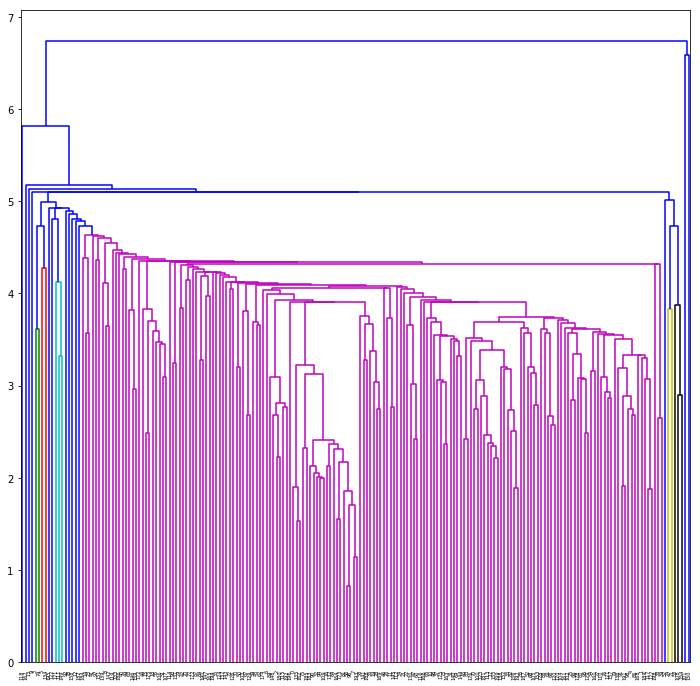

In [15]:
#Let's try some other clustering methods
Z = linkage(X_pca[rows[:200],:], 'single')
#Congfigure plot
plt.close()
plt.figure(figsize=(12, 12))
#Plot the dendrogram
_ = dendrogram(Z)

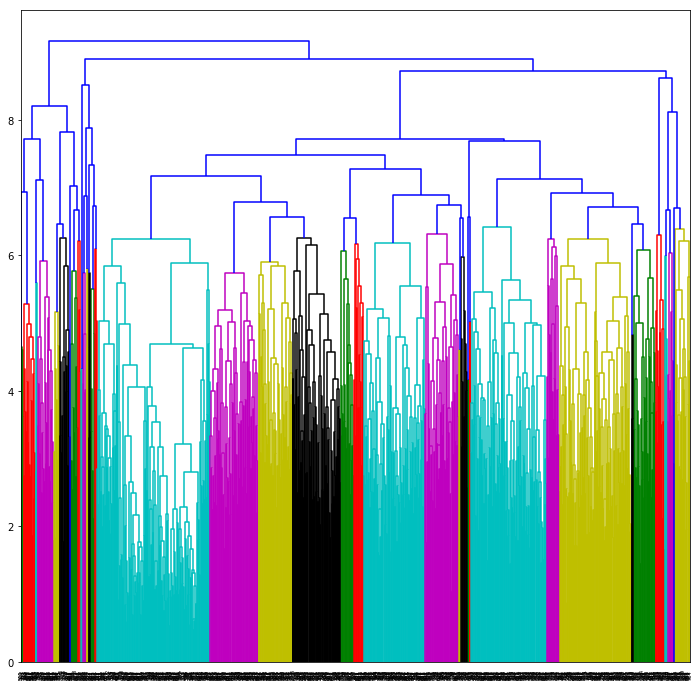

In [16]:
#Let's try some other clustering methods
Z = linkage(X_pca[rows[:1000],:], 'average')
#Congfigure plot
plt.close()
plt.figure(figsize=(12, 12))
#Plot the dendrogram
_ = dendrogram(Z)

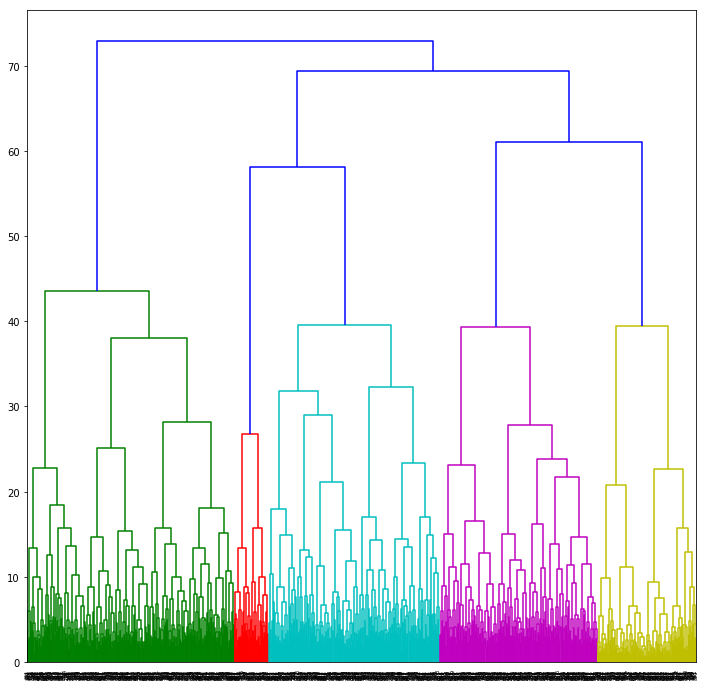

In [17]:
#Let's try some other clustering methods
Z = linkage(X_pca[rows[:1000],:], 'ward')
#Congfigure plot
plt.close()
plt.figure(figsize=(12, 12))
#Plot the dendrogram
_ = dendrogram(Z)

In [10]:
#I like ward and complete the best because they start grouping up the fastest. I'll use ward for my analysis.
#The colors suggest that I should use 5 groups but we know that there are 10 numbers, so I'll choose the point 
#there are 10 lines. These are fortunately well spaced.